In [1]:
import numpy as np

from one.api import ONE
one = ONE()
brain_acronym = 'VISp1'

# query sessions endpoint
sessions = one.search(atlas_acronym=brain_acronym, query_type='remote')
print(f'No. of detected sessions: {len(sessions)}\n')

# Print the first 5 eids
from pprint import pprint  # Print larger lists more clearly
pprint(sessions[:5])

eid = 'ca4ecb4c-4b60-4723-9b9e-2c54a6290a53'
pid = '92822789-608f-44a6-ad64-fe549402b2df'
eid, pname = one.pid2eid(pid)

session_path = one.eid2path(eid)
print(f'\nsession_path: {session_path}\n')

datasets = one.list_datasets(eid) # List all datasets in a session
pprint(datasets[0:])

print('\nDescription of trial_table:')
one.describe_dataset('trials.table'); # Describe a dataset

collections = one.list_collections(eid) # List all collections in a session
print('\n', collections)

No. of detected sessions: 29

['6899a67d-2e53-4215-a52a-c7021b5da5d4',
 'ca4ecb4c-4b60-4723-9b9e-2c54a6290a53',
 '642c97ea-fe89-4ec9-8629-5e492ea4019d',
 '2584ce3c-db10-4076-89cb-5d313138dd38',
 '0cf6d255-8f2f-463e-84fb-c54bacb79f51']

session_path: C:\Users\stell\Downloads\ONE\openalyx.internationalbrainlab.org\churchlandlab_ucla\Subjects\MFD_05\2023-08-16\001

['alf/_ibl_leftCamera.dlc.pqt',
 'alf/_ibl_leftCamera.features.pqt',
 'alf/_ibl_leftCamera.lightningPose.pqt',
 'alf/_ibl_leftCamera.times.npy',
 'alf/_ibl_rightCamera.dlc.pqt',
 'alf/_ibl_rightCamera.features.pqt',
 'alf/_ibl_rightCamera.times.npy',
 'alf/_ibl_trials.goCueTrigger_times.npy',
 'alf/_ibl_trials.stimOff_times.npy',
 'alf/_ibl_trials.table.pqt',
 'alf/_ibl_wheel.position.npy',
 'alf/_ibl_wheel.timestamps.npy',
 'alf/_ibl_wheelMoves.intervals.npy',
 'alf/_ibl_wheelMoves.peakAmplitude.npy',
 'alf/leftCamera.ROIMotionEnergy.npy',
 'alf/leftROIMotionEnergy.position.npy',
 'alf/licks.times.npy',
 'alf/probe00/electrode



---


⚡ **INFORMATION:** Most datasets are also described in this [Google Document](https://docs.google.com/document/d/1OqIqqakPakHXRAwceYLwFY9gOrm8_P62XIfCTnHwstg/edit#heading=h.hnjqyfnroyya)


---



In [2]:
# Download and load the spikes times for probe00
spike_times = one.load_dataset(eid, 'spikes.times.npy', collection='alf/probe00/pykilosort')
print(f'Spike times: {spike_times[:5]}')

spikes = one.load_dataset(eid, 'spikes.amps.npy', collection='alf/probe00/pykilosort')
print(f'Spikes: {spikes[:5]}')

Spike times: [0.01101179 0.01134513 0.01264512 0.01431178 0.01491178]
Spikes: [1.44502964e-04 8.48069590e-05 8.93127257e-05 1.07139996e-04
 1.44929477e-04]


In [3]:
# Download and load in the objects for probe00
spikes = one.load_object(eid, 'spikes', collection=f'alf/{pname}/pykilosort') # ssl.load_spike_sorting()
print('keys of spikes : ', list(spikes.keys()))

clusters = one.load_object(eid, 'clusters', collection=f'alf/{pname}/pykilosort') # ssl.load_spike_sorting()
print('keys of clusters : ', list(clusters.keys()))

channels = one.load_object(eid, 'channels', collection=f'alf/{pname}/pykilosort') # ssl.load_spike_sorting()
print('keys of channels : ', list(channels.keys()))

waveforms = one.load_object(eid, 'waveforms', collection=f'alf/{pname}/pykilosort')
print('keys of waveforms : ', list(waveforms.keys()))

templates = one.load_object(eid, 'templates', collection=f'alf/{pname}/pykilosort')
print('keys of templates : ', list(templates.keys()))

trials = one.load_object(eid, 'trials')
print('keys of trials : ', list(trials.keys()))

keys of spikes :  ['amps', 'clusters', 'depths', 'samples', 'templates', 'times']
keys of clusters :  ['amps', 'channels', 'depths', 'metrics', 'peakToTrough', 'uuids', 'waveforms', 'waveformsChannels']


c:\Users\stell\anaconda3\envs\iblenv\lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)


keys of channels :  ['brainLocationIds_ccf_2017', 'labels', 'localCoordinates', 'mlapdv', 'rawInd']


100%|██████████| 11/11.0 [00:03<00:00,  3.28it/s]
Inconsistent dimensions for object: waveforms 
(1117, 256, 40, 128),	traces
(1117, 40, 128),	templates
(285952,),	index
(285952,),	sample
(285952,),	cluster
(285952,),	peak_channel


keys of waveforms :  ['traces', 'channels', 'templates', 'index', 'sample', 'cluster', 'peak_channel']
keys of templates :  ['amps', 'waveforms', 'waveformsChannels']
keys of trials :  ['goCueTrigger_times', 'stimOff_times', 'goCue_times', 'response_times', 'choice', 'stimOn_times', 'contrastLeft', 'contrastRight', 'probabilityLeft', 'feedback_times', 'feedbackType', 'rewardVolume', 'firstMovement_times', 'intervals']


In [4]:
# -------------------------------------------
from brainbox.io.one import SessionLoader

# instantiate session loader
sess_loader = SessionLoader(one=one, eid=eid)

# Load in trials data
sess_loader.load_trials()

sess_loader.data_info

# The different types of data are loaded as pandas dataframes that you can access via the respective attributes, for example
# access trials data and list the keys of dataframe
print(f'Keys in trials data:\n\n   {sess_loader.trials.keys()}')

# -------------------------------------------
from brainbox.io.one import SpikeSortingLoader

spike_loader = SpikeSortingLoader(pid=pid, one=one)
spikes, clusters, channels = spike_loader.load_spike_sorting()

# Assign brain location information from channels to clusters
clusters = spike_loader.merge_clusters(spikes, clusters, channels)

# -------------------------------------------
from brainbox.io.one import EphysSessionLoader

ephys_sess_loader = EphysSessionLoader(eid=eid, one=one)

ephys_sess_loader.load_session_data()
ephys_sess_loader.load_spike_sorting()

# Access the insertion names that we have data for
probes = list(ephys_sess_loader.ephys.keys())
print(f'Name of probes loaded: {probes}')

# Acess the spikesorting data for the first probe
spikes = ephys_sess_loader.ephys[probes[0]]['spikes']
print(f'Keys of spikes data: {spikes.keys()}')

Keys in trials data:

   Index(['goCueTrigger_times', 'stimOff_times', 'goCue_times', 'response_times',
       'choice', 'stimOn_times', 'contrastLeft', 'contrastRight',
       'probabilityLeft', 'feedback_times', 'feedbackType', 'rewardVolume',
       'firstMovement_times', 'intervals_0', 'intervals_1'],
      dtype='object')


The spikesorting data for each insertion is stored as a dict in the `ephys` attribute,

# Exploring the data

### Example 1: Characterising the reaction time of the subject in a session

In [6]:
trials = one.load_object(eid, 'trials')

keys = trials.keys() # Find the keys in our object

from IPython.display import display # import module to display dataframe nicely
trials_df = trials.to_df()
display(trials_df)

# 3. Compute reaction time
# Define reaction time as the time when the visual stimulus first appears and detected response time
reaction_time = trials['response_times'] - trials['stimOn_times']
print(f'Reaction time: {reaction_time[:5]}')

# 4. Evaluate reaction time across different trial types
# Compare reaction time for left vs right trials
left_trial_idx = ~np.isnan(trials['contrastLeft'])
right_trial_idx = ~np.isnan(trials['contrastRight'])
left_reaction_time = np.mean(reaction_time[left_trial_idx])
right_reaction_time = np.mean(reaction_time[right_trial_idx])
print(f'Average reaction time for stimulus on')
print(f'Left: {left_reaction_time}')
print(f'Right: {right_reaction_time}')

# Compare reaction time for correct vs incorrect trials
correct_trial_idx = trials['feedbackType'] == 1
incorrect_trial_idx = trials['feedbackType'] == -1
correct_reaction_time = np.mean(reaction_time[correct_trial_idx])
incorrect_reaction_time = np.mean(reaction_time[incorrect_trial_idx])
print(f'\nAverage reaction time for trials that were')
print(f'Correct: {correct_reaction_time}')
print(f'Incorrect: {incorrect_reaction_time}')

# 5. Make plot of reaction time across session
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(trials['stimOn_times'], reaction_time, c='k', s=5)
ax.set_yscale("log")  # set y axis to log scale
ax.set_xlabel('Time in session (s)')
ax.set_ylabel('Reaction time (s)')

,goCueTrigger_times,stimOff_times,goCue_times,response_times,choice,stimOn_times,contrastLeft,contrastRight,probabilityLeft,feedback_times,feedbackType,rewardVolume,firstMovement_times,intervals_0,intervals_1
0,18.265063,19.599184,18.266063,18.526168,-1.0,18.365397,NaN,1.000,0.5,18.526282,1.0,1.5,18.364963,17.143841,20.099301
1,23.665450,25.032057,23.666450,23.965253,1.0,23.665315,0.25,NaN,0.5,23.965354,1.0,1.5,23.645963,20.761912,25.532176
2,28.282413,29.832021,28.283413,28.765920,-1.0,28.282295,NaN,0.250,0.5,28.766018,1.0,1.5,28.372963,26.219882,30.332146
3,32.232573,33.898551,32.233373,32.832782,-1.0,32.232436,NaN,0.125,0.5,32.832881,1.0,1.5,32.309963,30.944353,34.398608
4,35.582521,36.915843,35.583421,35.855823,-1.0,35.582398,NaN,0.250,0.5,35.855940,1.0,1.5,35.543963,35.016016,37.415938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,3545.090054,3553.656329,3545.090854,3551.619542,-1.0,3545.089874,0.25,NaN,0.2,3551.620542,-1.0,0.0,3551.032963,3544.650948,3554.156379
616,3555.390193,3557.289765,3555.391193,3556.241702,-1.0,3555.390071,NaN,0.125,0.2,3556.241794,1.0,1.5,3555.592963,3554.856086,3557.789822
617,3558.873836,3561.223274,3558.874536,3559.159442,1.0,3558.873721,NaN,0.125,0.2,3559.160542,-1.0,0.0,3558.784963,3558.433128,3561.723293
618,3562.990612,3564.706491,3562.991512,3563.642222,-1.0,3562.990447,NaN,1.000,0.2,3563.642321,1.0,1.5,3563.152963,3562.365204,3565.206546


### 🏠 Example 2: Characterising the electrophysiology data of a single insertion

In this example we show how to

1.   Load in spikesorting data for a single insertion data
2.   Evaluate the number of good clusters
3.   Find the location of good clusters in the brain
4.   Compute the firing rate of each cluster
5.   Plot the firing rate of good clusters alongside their brain location



In [8]:
# 1. Load in spikesorting data for pid
from brainbox.io.one import SpikeSortingLoader
from iblatlas.atlas import AllenAtlas

ba = AllenAtlas()

ssl = SpikeSortingLoader(one=one, pid=pid, atlas=ba)
spikes, clusters, channels = ssl.load_spike_sorting()
clusters = ssl.merge_clusters(spikes, clusters, channels)

c:\Users\stell\anaconda3\envs\iblenv\lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)
c:\Users\stell\anaconda3\envs\iblenv\lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)


In [9]:
# 2. Evaluate the number of good clusters
# The spikesortingloader loads data for all clusters (both mua and good) detected by the spikesorter.
# We can restrict to only the good clusters by finding the clusters with a label of 1
good_cluster_idx = clusters['label'] == 1
clusters_good = {key:val[good_cluster_idx] for key, val in clusters.items()}

all_clusters = clusters['label'].shape
good_clusters = clusters_good['label'].shape
print(f'Total no. of clusters: {all_clusters}')
print(f'Number of good clusters: {good_clusters}')

Total no. of clusters: (765,)
Number of good clusters: (75,)


In [10]:
# 3. Find the location of clusters in brain
# The location of the clusters can be found in the atlas_id (Allen CCF ids) or acronym attributes of the clusters object
acronyms = clusters_good['acronym']
unique_acronyms, count = np.unique(acronyms, return_counts=True)
for a, c in zip(unique_acronyms, count):
  print(f'{a}: {c}')

MB: 1
MRN: 9
ProS: 18
RN: 6
SCig: 5
SCiw: 4
SUB: 3
VISp2/3: 9
VISp4: 3
VISp5: 9
VISp6a: 5
alv: 1
or: 2


In [11]:
# 4. Compute the firing rate of each cluster
# The firing rate of each cluster can be found in the firing rate atrribute of the clusters object
firing_rate = clusters_good['firing_rate']

# To show the interaction between the clusters and the spikes object we will show how you can compute
# the firing rate from the data

# To compute the firing rate we first need to compute the number of spikes detected for each cluster
n_spikes = np.empty((clusters_good['cluster_id'].shape))
# Loop over the cluster ids
for i, c in enumerate(clusters_good['cluster_id']):
  # Find location where each cluster id is found in the spikes objects and get the sum
  cidx = np.sum(spikes['clusters'] == c)
  n_spikes[i] = cidx

# To compute the firing rate we can divide the spike count by the total duration of the recording
duration = np.max(spikes['times']) - np.min(spikes['times'])
firing_rate_from_spikes = n_spikes / duration

# Make sure that the values for firing rates are the same
np.array_equal(firing_rate_from_spikes, firing_rate)

False

C:\Users\stell\AppData\Local\Temp\ipykernel_22800\861508613.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('hot'))
C:\Users\stell\AppData\Local\Temp\ipykernel_22800\861508613.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('hot'))


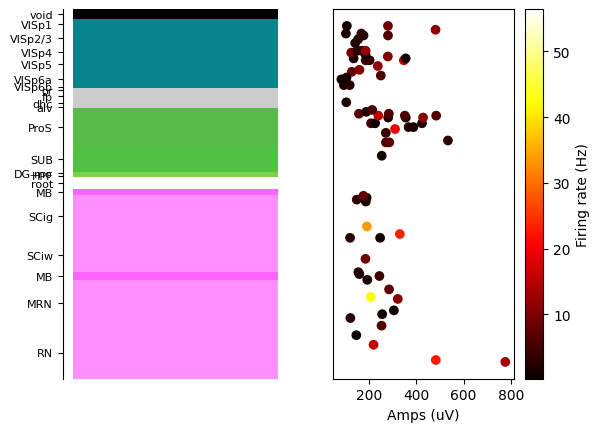

In [12]:
# 5. Plot firing rate and brain locations
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from brainbox.ephys_plots import plot_brain_regions
clusters_good.keys()

norm = colors.Normalize(vmin=np.min(firing_rate), vmax=np.max(firing_rate), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('hot'))
firing_rate_cols = mapper.to_rgba(firing_rate)

fig, axs = plt.subplots(1, 2)
# Plot the brain regions through which the channels on the insertion pass
plot_brain_regions(channels['atlas_id'], channel_depths=channels['axial_um'], ax=axs[0])
# Plot scatter plot of cluster depths vs cluster amp with firing rate encoded in colour
# Map firing rate values to colours
norm = colors.Normalize(vmin=np.min(firing_rate), vmax=np.max(firing_rate), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('hot'))
firing_rate_cols = mapper.to_rgba(firing_rate)
axs[1].scatter(clusters_good['amp_median'] * 1e6, clusters_good['depths'], c=firing_rate_cols)
axs[1].set_xlabel('Amps (uV)')
axs[1].get_yaxis().set_visible(False)
# Add colorbar
cbar = fig.colorbar(mapper, ax=axs[1])
cbar.set_label('Firing rate (Hz)')

### Example 3: Characterising event aligned activity of a single cluster

In this example we will show how to


1.   Load in trials data for a single session and spikesorting data for a single insertion
2.   Get spikes for chosen cluster
3.   Compute and plot firing rate of cluster around trial event
4.   Compute and plot peristimulus time histograms for different trial conditions (left vs right, correct vs incorrect)



In [13]:
# 1. Load in trials data and spikesorting data
from brainbox.io.one import SessionLoader, SpikeSortingLoader
from one.api import ONE
from iblatlas.atlas import AllenAtlas
import numpy as np

ba = AllenAtlas()
one = ONE()
pid = '92822789-608f-44a6-ad64-fe549402b2df'
eid, _ = one.pid2eid(pid)

sl = SessionLoader(eid=eid, one=one)
sl.load_trials()

ssl = SpikeSortingLoader(one=one, pid=pid, atlas=ba)
spikes, clusters, channels = ssl.load_spike_sorting()
clusters = ssl.merge_clusters(spikes, clusters, channels)

c:\Users\stell\anaconda3\envs\iblenv\lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)
c:\Users\stell\anaconda3\envs\iblenv\lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)


In [14]:
# 2. Get spikes for a single cluster
# Get the 25th good cluster
cluster_id = np.where(clusters['label'] == 1)[0][25]

# Get the index of the spikes object for the chosen cluster
spikes_idx = spikes['clusters'] == cluster_id

Text(0, 0.5, 'Trial number')

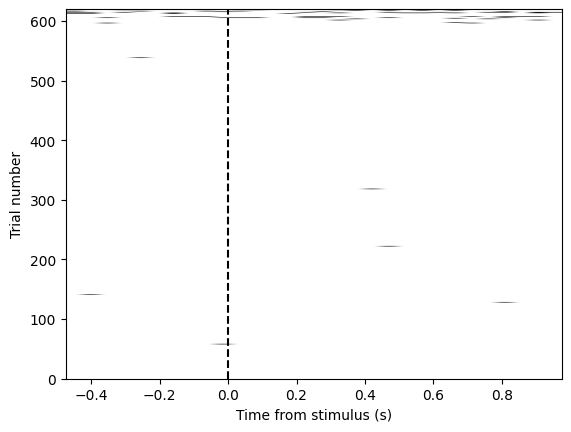

In [15]:
# 3. Compute firing rate of cluster around trial event and plot as a raster
# Find times when stimulus appears
events = sl.trials['stimOn_times']

from brainbox.singlecell import bin_spikes
# Compute number of spikes in 0.05s bins between 0.5s before stimulus presentation to 1s after stimulus presentation
bin_size = 0.05
pre_time = 0.5
post_time = 1

# events = sl.trials['stimOn_times'].values  # 또는 .to_numpy()
# spike_raster, times = bin_spikes(
#     spikes.times[spikes_idx],
#     events,  # 이제 numpy.ndarray 형태
#     pre_time=pre_time,
#     post_time=post_time,
#     bin_size=bin_size
# )
# spike_raster = spike_raster / bin_size


spike_raster, times = bin_spikes(spikes.times[spikes_idx], events, pre_time=pre_time, post_time=post_time, bin_size=bin_size)
spikes_raster = spike_raster / bin_size

fig, ax = plt.subplots()
ax.imshow(spike_raster, extent=[times[0], times[-1], 0, events.size], origin='lower', cmap='binary', aspect='auto', vmax=20, vmin=0)
ax.axvline(0, c='k', linestyle='--')
ax.set_xlabel('Time from stimulus (s)')
ax.set_ylabel('Trial number')

Text(0.5, 0, 'Time from stimulus (s)')

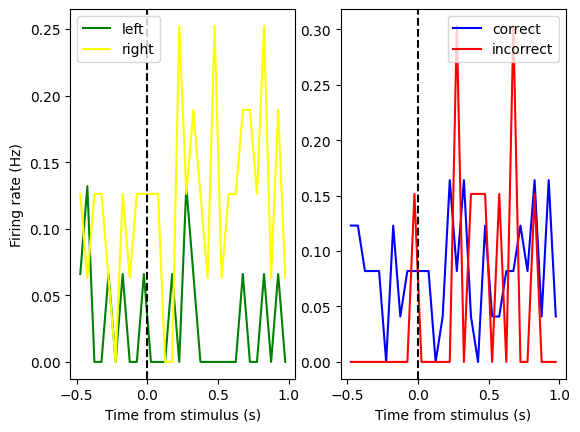

In [16]:
# 4. Compute peri stimulus time histogram for different trial events
# Compute psth for left vs right stimulus trials
left_idx = ~np.isnan(sl.trials['contrastLeft'])
right_idx = ~np.isnan(sl.trials['contrastRight'])
psth_left = np.nanmean(spike_raster[left_idx], axis=0)
psth_right = np.nanmean(spike_raster[right_idx], axis=0)

# Compute psth for correct vs incorrect trials
correct_idx = sl.trials['feedbackType'] == 1
incorrect_idx = sl.trials['feedbackType'] == -1
psth_correct = np.nanmean(spike_raster[correct_idx], axis=0)
psth_incorrect = np.nanmean(spike_raster[incorrect_idx], axis=0)

# Plot the psths
fig, axs = plt.subplots(1, 2)
axs[0].plot(times, psth_left, c='green')
axs[0].plot(times, psth_right, c='yellow')
axs[0].legend(['left', 'right'])
axs[0].axvline(0, c='k', linestyle='--')
axs[0].set_xlabel('Time from stimulus (s)')
axs[0].set_ylabel('Firing rate (Hz)')

axs[1].plot(times, psth_correct, c='blue')
axs[1].plot(times, psth_incorrect, c='red')
axs[1].legend(['correct', 'incorrect'])
axs[1].axvline(0, c='k', linestyle='--')
axs[1].set_xlabel('Time from stimulus (s)')

# FAQ



Where can I find out more information about the IBL?
- [IBL website](https://www.internationalbrainlab.com/)

How can I easily explore the IBL data available?
- [IBL visualisation website](https://viz.internationalbrainlab.org/)

Where can I find more information about the Brain-wide map?
- [Brain-wide map technical paper](https://figshare.com/articles/preprint/Data_release_-_Brainwide_map_-_Q4_2022/21400815)

Where can I find out more information about available dataset releases?
- [Publically available IBL data](https://int-brain-lab.github.io/iblenv/public_docs/public_introduction.html)

Where can I read more about the science conducted in the IBL?
- [List of publications](https://www.internationalbrainlab.com/publications)

Where can I find out more information about ONE?
- [ONE documentation](https://int-brain-lab.github.io/ONE/)

Where can I find out more information about ibllib and brainbox?
- [ibllib documentation](https://int-brain-lab.github.io/iblenv/010_api_reference.html)

Where can I find out more information about iblatlas?
- [Atlas examples](https://int-brain-lab.github.io/iblenv/atlas_examples.html)

Where can I find out more information about different IBL datasets?
- [Description of public datasets](https://docs.google.com/document/d/1OqIqqakPakHXRAwceYLwFY9gOrm8_P62XIfCTnHwstg/edit#heading=h.hnjqyfnroyya)

Where can I find help?
- Issues with the data? Post an issue here: https://neurostars.org/ with the tag `ibl`
- Alternatively post an issue here: https://github.com/int-brain-lab/iblenv/issues
- General questions about the datasets or publications? Email: info@internationalbrainlab.org

